<a href="https://colab.research.google.com/github/rim-yu/SGU_ANT6320_Assignment/blob/master/Exercise_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 1 - What's your pet

Welcome to lesson 1! For those of you who are using a Jupyter Notebook for the first time, you can learn about this useful tool in a tutorial we prepared specially for you; click `File`->`Open` now and click `00_notebook_tutorial.ipynb`. 

In this lesson we will build our first image classifier from scratch, and see if we can achieve world-class results. Let's dive in!

Every notebook starts with the following three lines; they ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

**RIM'S MEMO**


They ensure that any edits to libraries you make are reloaded here automatically, and also that any charts or images displayed are shown in this notebook.

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

**RIM'S MEMO**

We are going to work with the fastai V1 library which sits on top of Pytorch 1.0. The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [0]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

## Looking at the data

We are going to use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differentiate between these 37 distinct categories. According to their paper, the best accuracy they could get in 2012 was 59.21%, using a complex model that was specific to pet detection, with separate "Image", "Head", and "Body" models for the pet photos. Let's see how accurate we can be using deep learning!

We are going to use the `untar_data` function to which we must pass a URL as an argument and which will download and extract the data.

In [0]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



**RIM'S MEMO**

**URLs** is a class from fastai. datasets, we imported it as from fastai import 

**PETS** is a string constant with the path as ‘https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet

In [0]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

**RIM'S MEMO**

When you do have a path object, seeing what's in it actually takes a lot more typing than i would like. So sometimes we add functionality into existing Python stuff. One of the things we do is add a **ls()** method to path.

These are what's inside this path, so that's what we just downloaded.

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

**RIM'S MEMO**

This is a really convenient function that's part of Python 3. it's fuctionality from **pathlib.** Path object is much better to use than strings. They let you use basically create sub paths like this. path_img is the path to the images in that dataset.  

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

The first thing we do when we approach a problem is to take a look at the data. We _always_ need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.

The main difference between the handling of image classification datasets is the way labels are stored. In this particular dataset, labels are stored in the filenames themselves. We will need to extract them to be able to classify the images into the correct categories. Fortunately, the fastai library has a handy function made exactly for this, `ImageDataBunch.from_name_re` gets the labels from the filenames using a [regular expression](https://docs.python.org/3.6/library/re.html).

**RIM'S MEMO**

**get_image_files** will just grab an array of all of the image files based on extension in a path.

In [0]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_112.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/keeshond_61.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_77.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/leonberger_17.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_193.jpg')]

**RIM'S MEMO**

Regular expressions are a way to search a string in the text using pattern matching methods.

**r** : The string should be a raw string. Otherwise, \d would have to be written as \d so that Python doesn’t interpret it to be a special character.

**/** : first '/' in regex says, end of search.

**([^/]+)** : searches all characters except '/'.

**\d** : numerical digits, '+' sign denotes can be one or more of them.

**$** : end of search.

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

**RIM'S MEMO**

**There is a class called ImageDataBunch from fastai.vision.data, which will hold all the data you need an i.e train, val sets.**

An **ImageDataBunch** represents all of the data you need to build a model and there's some factory method which try to make it really easy for you to create that data bunch - a training set, a validation set  with images and labels.

We need to extract the labels from the names. We are going to use **from_name_re**. re is the module in Python that does regular expression - things that's really useful for extracting text.

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

**RIM'S MEMO**

You can be see **data.show_batch** can be used to show me some of the contents in my data bunch. 

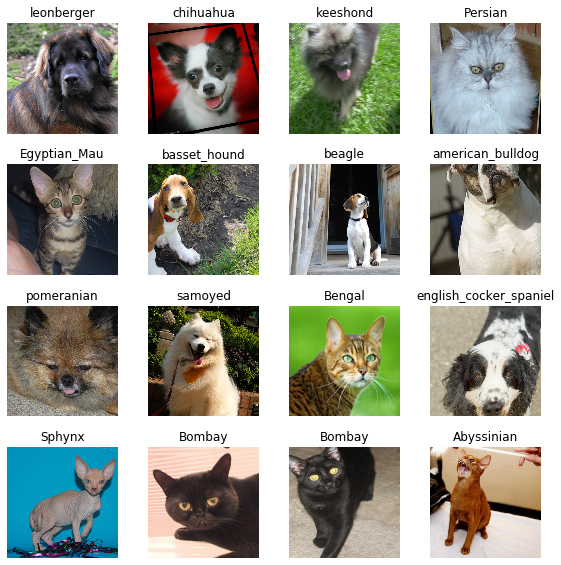

In [0]:
data.show_batch(rows=4, figsize=(8, 8))

**RIM'S MEMO**

The other thing we want to do is to look at the labels. All of the possible label names are called your classes. With DataBunch, you can print out your **data.classes.**

We learnt earlier on at the top that there are 37 possible categories, so just checking len(data.classes), it is indeed 37. DataBunch will always have a property called **c.** **data.c** is a really important piece of information that is something like, or at least for classification problems it is, the number of classes. 

In [0]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 outputs).

We will train for 4 epochs (4 cycles through all our data).

**RIM'S MEMO**

It is to create a learner for a convolutuinal neural network, you just have to tell it two things: data and arch. There are lots of different ways of constructing a convolutional neural network.

The most important thing for you to know is that there's a particular kind of model called ResNet(Residual Network) which works extremely well nearly all the time.

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

**RIM'S MEMO**

The first time i run this on a newly installed box, it downloads the ResNet34 pre-trained weights. What that means is that this particular model has actually been trained for a particular task. 

We will take a pre-trained model, and then we fit it so that instead of predicting a thousand categories of ImageNet with ImageNet data, it predicts the 37 categories of pets using your pet data. 

We have a ConvLearner, we can fit it. You can just use a method called **fit** but in practice, you should nearly always use a method called **fit_one_cycle.**

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.310137,0.303194,0.102165,01:28
1,0.588348,0.263294,0.091340,01:29
2,0.391472,0.216940,0.075101,01:27
3,0.294674,0.206205,0.067659,01:31


**RIM'S MEMO**

You can just go **learn.save** and give it a name. It's going to put it in a model subdirectory in the same place the data came from, so if you save different models or different data bunches from different datasets, they'll all be kept separate.

In [0]:
learn.save('stage-1')

## Results

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

**RIM'S MEMO**

**ClassificationInterpretation** has methods for creating confusion matrix as well as plotting misclassified images. Learn object knows 2 things, data and model. The Model here is not just the architecture but a trained model with weights. 

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

**RIM'S MEMO**

One of the things, perhaps the most useful things to do is called **plot_top_losses.** a loss function is something that tells you how good was your prediction. 

By plotting the top losses, we are going to find out what were the things that we were the most wrong on, or the most confident about what we got wrong. 

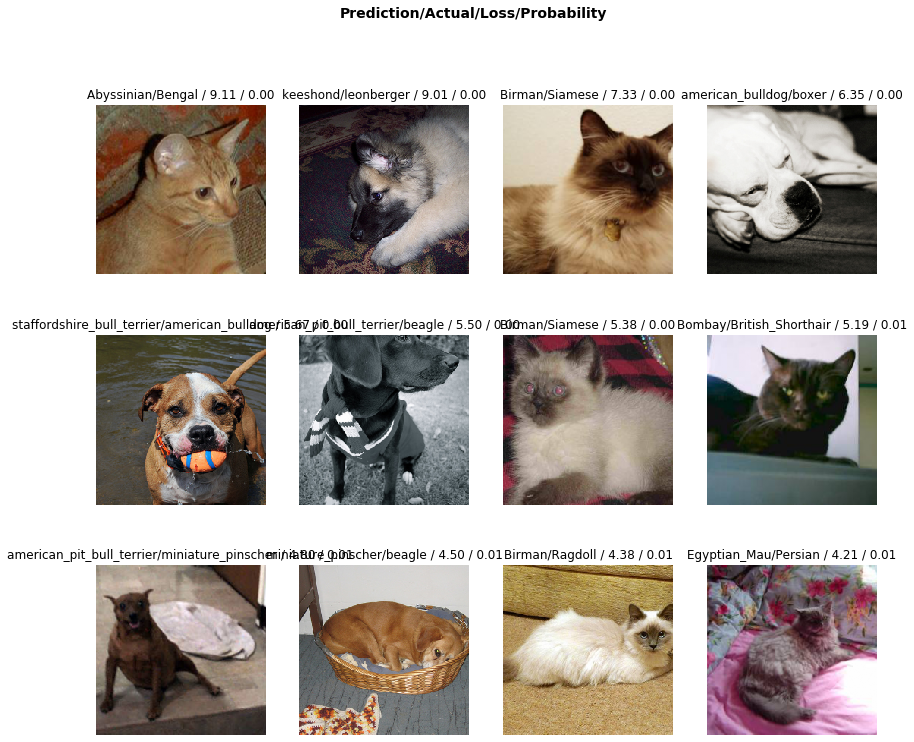

In [0]:
interp.plot_top_losses(12, figsize=(14,12))

**RIM'S MEMO**

To open up class documentation and source use **doc** function. doc will open up the documentation page for you. 

That's how we can look at top losses and these are perhaps the most important image classification interpretation tools that we have. 

In [0]:
doc(interp.plot_top_losses)

**RIM'S MEMO**

Another useful tool, kind of, is to use something called a **confusion matrix** which basically shows you for every actual type of dog or cat, how many times was it predicted to be that dog or cat. 

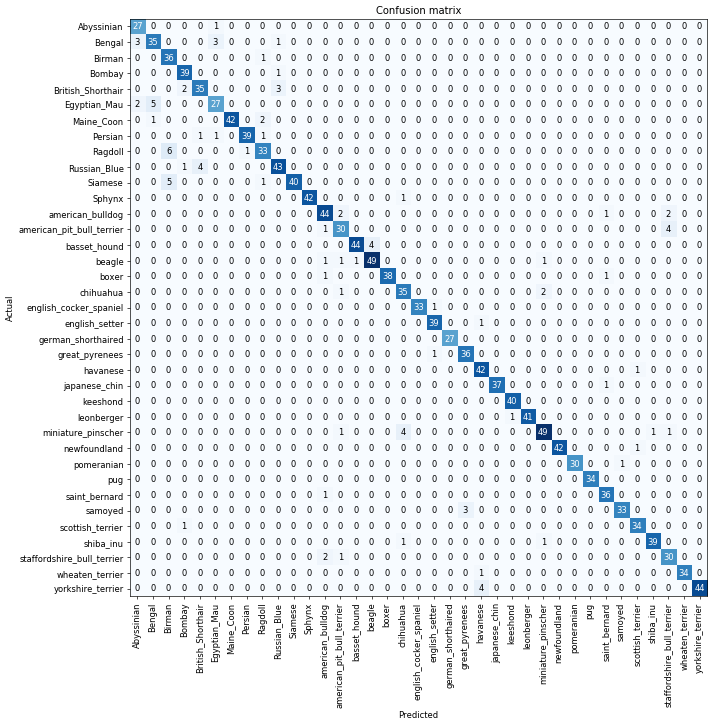

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

**RIM'S MEMO**

**most_confused** will simply grab out of the confusion matrix the particular combinations of predicted and actual that got wrong the most often. 

In [0]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 6),
 ('Egyptian_Mau', 'Bengal', 5),
 ('Siamese', 'Birman', 5),
 ('Russian_Blue', 'British_Shorthair', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('basset_hound', 'beagle', 4),
 ('miniature_pinscher', 'chihuahua', 4),
 ('yorkshire_terrier', 'havanese', 4),
 ('Bengal', 'Abyssinian', 3),
 ('Bengal', 'Egyptian_Mau', 3),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('samoyed', 'great_pyrenees', 3),
 ('British_Shorthair', 'Bombay', 2),
 ('Egyptian_Mau', 'Abyssinian', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

**RIM'S MEMO**

**unfreeze()** is the thing that says please train the whole model. 

In [0]:
learn.unfreeze()

**RIM'S MEMO**

Then I can call fit_one_cycle again. **The error got much worse.** 

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.682637,0.414994,0.132612,01:32


**RIM'S MEMO**

This brings back the model that we saved earlier. Let's load that back up and now our models back to where it was before we killed it. 

In [0]:
learn.load('stage-1');

**RIM'S MEMO**

Let's run **learning rate finder.** 

In [0]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


**RIM'S MEMO**

This will plot the result of our learning rate finder and what this basically shows you is this key parameter called a learning rate. You can see, once the learning rate gets passed **1e-04**, my loss gets worse. 

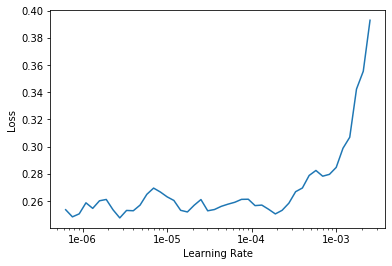

In [0]:
learn.recorder.plot()

**RIM'S MEMO**

**We can pass a range of learning rates to learn.fit_one_cycle.** 

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.240790,0.198236,0.068336,01:32
1,0.221468,0.195924,0.064953,01:34


That's a pretty accurate model!

## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. It will be explained later in the course and you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here. To help it along, let's us use larger images too, since that way the network can see more detail. We reduce the batch size a bit since otherwise this larger network will require more GPU memory.

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


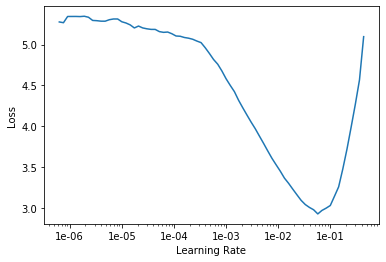

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.699543,0.257927,0.082544,02:27
1,0.474829,0.270403,0.081867,02:25
2,0.441680,0.276600,0.078484,02:25
3,0.341417,0.230548,0.069689,02:24
4,0.264190,0.187407,0.055480,02:25
5,0.178100,0.168457,0.050744,02:24
6,0.130503,0.146322,0.046685,02:26
7,0.110516,0.139743,0.044655,02:25


In [0]:
learn.save('stage-1-50')

It's astonishing that it's possible to recognize pet breeds so accurately! Let's see if full fine-tuning helps:

In [0]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.112622,0.139116,0.043978,02:41
1,0.108408,0.131263,0.036536,02:41
2,0.092501,0.134539,0.037889,02:41


If it doesn't, you can always go back to your previous model.

In [0]:
learn.load('stage-1-50');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('miniature_pinscher', 'chihuahua', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('boxer', 'american_bulldog', 3),
 ('Egyptian_Mau', 'Bengal', 2),
 ('Ragdoll', 'Persian', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

## Other data formats

In [0]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/root/.fastai/data/mnist_sample')

####Scenario 1: Labels are folder names

**RIM'S MEMO**

We can see ther are a training set and the validation set already. 

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_sample/train'),
 PosixPath('/root/.fastai/data/mnist_sample/valid')]

**RIM'S MEMO**

There are a folder called 3 and a folder called 7. Everything that's a three, we put that in a folder called 3. Everything that's a seven, we'll put in a folder called 7. 

In [0]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/mnist_sample/train/3'),
 PosixPath('/root/.fastai/data/mnist_sample/train/7')]

**RIM'S MEMO**

**"Data Augmentation"** : To get a set of transforms with default values that work pretty well in a wide range of tasks, it's often easiest to use **get_transforms.** Depending on the nature of the images in you data, you may want to adjust a few arguments, the most important being:

**do flip** : if True the image is randomly flipped (default behavior).

**flip_vert** : limit the flips to horizontal flips (when False) or to horizontal and vertical flips as well as 90-degrees rotations (when True).

If we have something in this format where the labels are just whatever the folders are called, we can say **from_folder.**

In [0]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)

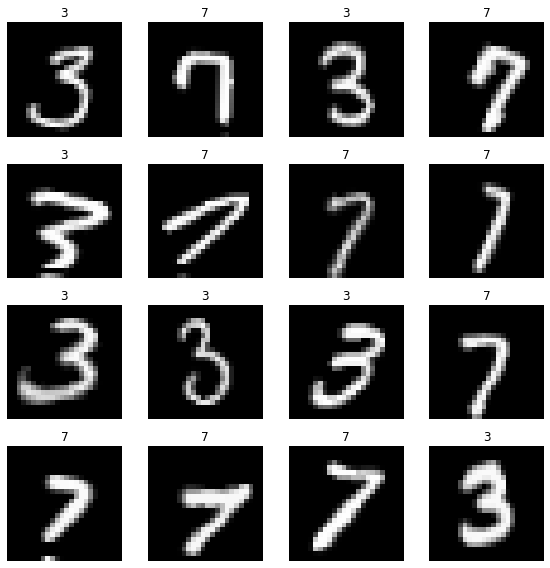

In [0]:
data.show_batch(rows=4, figsize=(8,8))

In [0]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.189036,0.082295,0.970069,00:21
1,0.122347,0.050676,0.984789,00:20


####Scenario 2: CSV file

In [0]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


**RIM'S MEMO**

For each file name, what's its label. In this case, labels are not three or seven, they are 0 or 1 which is it a 7 or not. So that's another possibility. If this is how your labels are, you can use **from_csv.**

In [0]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

[0, 1]

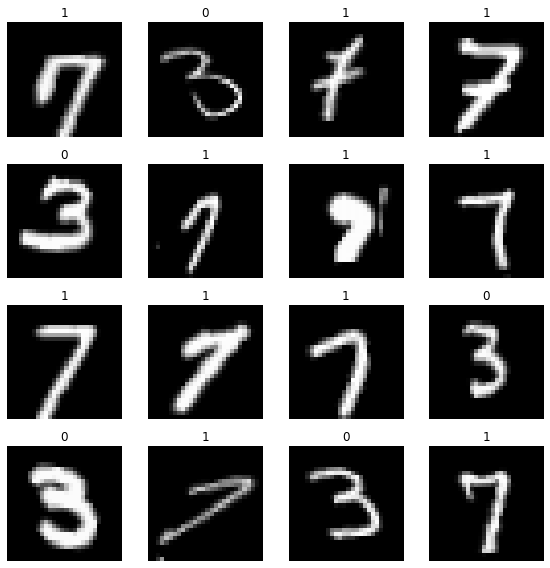

In [0]:
data.show_batch(rows=4, figsize=(8,8))
data.classes

In [0]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)
data.classes

[0, 1]

####Scenario 3: Using regular expression 

In [0]:
fn_paths = [path/name for name in df['name']]; fn_paths[:6]

[PosixPath('/root/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/21102.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/31559.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/46882.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/26209.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/41391.png')]

In [0]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)
data.classes

['3', '7']

####Scenario 4: Something more complex

In [0]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,
        label_func = lambda x: '3' if '/3/' in str(x) else '7')
data.classes

['3', '7']

####Scenario 5: You need something even more flexible

In [0]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:5]

['3', '3', '3', '3', '3']

In [0]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']